Exercise 1: Duplicate Detection And Removal

Instructions

Objective: Identify and remove duplicate entries in the Titanic dataset.

Load the Titanic dataset.
Identify if there are any duplicate rows based on all columns.
Remove any duplicate rows found in the dataset.
Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
Hint: Use the duplicated() and drop_duplicates() functions in Pandas.

In [30]:
import pandas as pd

#Load the Titanic dataset.
titanic_df = pd.read_csv('train.csv')
print(titanic_df.head())

#Identify if there are any duplicate rows based on all columns.
print(titanic_df.duplicated().sum())

#Remove any duplicate rows found in the dataset.
deduplicated_titanic_df = titanic_df.drop_duplicates()
print(len(titanic_df))
print(len(deduplicated_titanic_df))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
0


Exercise 2: Handling Missing Values

Instructions

Identify columns in the Titanic dataset with missing values.
Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
Apply each strategy to different columns based on the nature of the data.
Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.

In [31]:
#Identify columns in the Titanic dataset with missing values.
print(titanic_df.isnull().sum())

#Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
#For 'Age', with 177 null values out of 890, I consider filling with the average value
#For 'Cabin', with 687 null values out of 890, I consider filling with a constant value like "Unknown"
#For 'Embarked', with 2 null values out of 890, I consider dropna

#Apply each strategy to different columns based on the nature of the data.
# Make a deep copy of the original DataFrame
cleaned_df = titanic_df.copy()

# Apply missing value handling on the copy
cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].mean())
cleaned_df['Cabin'] = cleaned_df['Cabin'].fillna('Unknown')
cleaned_df.dropna(subset=['Embarked'], inplace=True)

print(cleaned_df.head())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21

Exercise 3: Feature Engineering

Instructions

Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features if required.
Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.

In [32]:
#Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
cleaned_df['Family Size'] = cleaned_df['SibSp'] + cleaned_df['Parch'] +1
cleaned_df['Title'] = cleaned_df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

#Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
from sklearn.preprocessing import LabelEncoder

for col in ['Sex', 'Embarked', 'Title']:
    cleaned_df[col] = LabelEncoder().fit_transform(cleaned_df[col])

#Normalize or standardize numerical features if required.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_df[['Age', 'Fare']] = scaler.fit_transform(cleaned_df[['Age', 'Fare']])


print(cleaned_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229      1   
2                             Heikkinen, Miss. Laina    0  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531      1   
4                           Allen, Mr. William Henry    1  0.434531      0   

   Parch            Ticket      Fare    Cabin  Embarked  Family Size  Title  
0      0         A/5 21171  0.014151  Unknown         2            2     11  
1      0          PC 17599  0.139136      C85         0            2     12  
2      0  STON/O2. 3101282  0.015469  Unknown         2            1      8  
3 

Exercise 4: Outlier Detection And Handling

Instructions

Use statistical methods to detect outliers in columns like Fare and Age.
Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
Implement the chosen strategy and assess its impact on the dataset.

Fare: 114 outliers (12.82%)
Age: 65 outliers (7.31%)


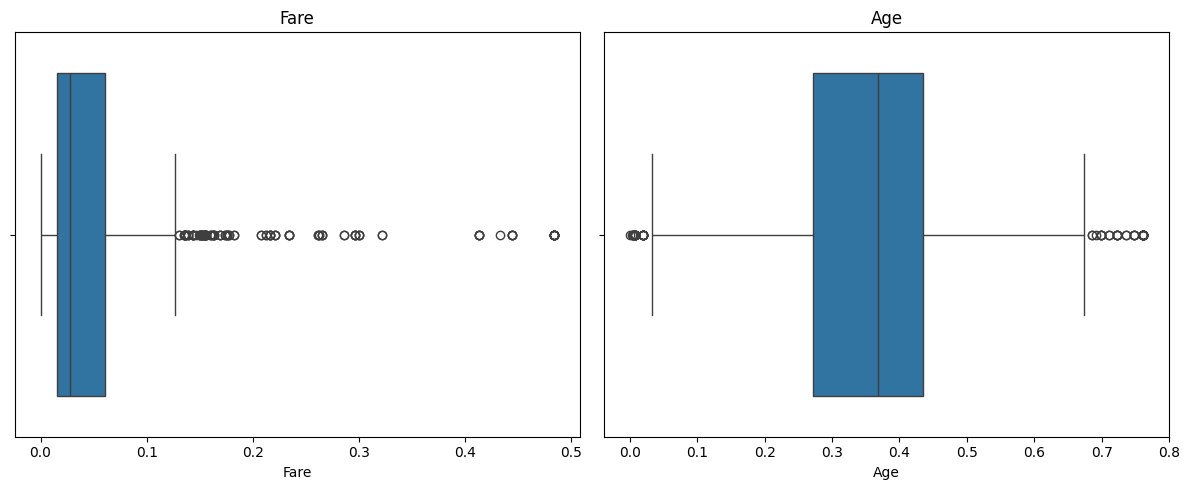

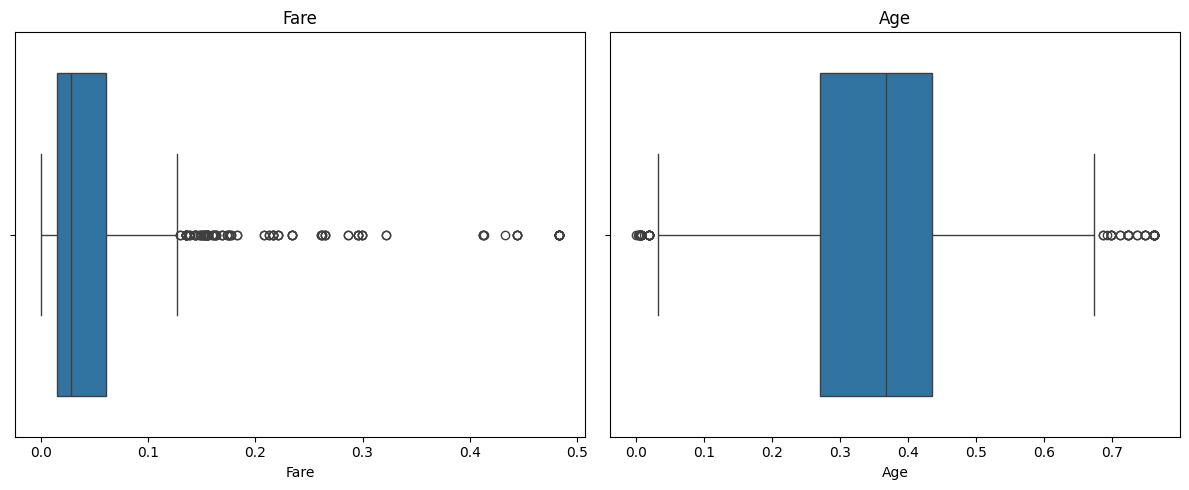

In [48]:
#Use statistical methods to detect outliers in columns like Fare and Age.
def get_outliers(column):
    #Calculate Q1 et Q3 for the column
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    #Caluculate IQR
    IQR = Q3 - Q1
    #Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return boolean Series where True means an outlier
    return (column < lower_bound) | (column > upper_bound)

#Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
#Step 1: Identify and count outliers per column
def count_outliers(df, col_name):
    mask = get_outliers(df[col_name])
    count = mask.sum()
    percent = 100 * count / len(df)
    return count, round(percent, 2)

for col in ['Fare', 'Age']:
    count, percent = count_outliers(cleaned_df, col)
    print(f"{col}: {count} outliers ({percent}%)")

#Step 2: Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Boxplot for Fare
sns.boxplot(x=cleaned_df['Fare'], ax=axes[0])
axes[0].set_title('Fare')

# Boxplot for Age
sns.boxplot(x=cleaned_df['Age'], ax=axes[1])
axes[1].set_title('Age')

# Display
plt.tight_layout()
plt.show()

#Scaling was already performed, so transformation is no longer an option
#Outliers make for significant parts of the dataset (Age: 7.31%, Fare: 12.82%), so dropping is not viable either
#We will cap both
cleaned_df['Fare'] = cleaned_df['Fare'].clip(upper=cleaned_df['Fare'].quantile(0.99))
cleaned_df['Age'] = cleaned_df['Age'].clip(upper=cleaned_df['Age'].quantile(0.98))

# Set up the figure with 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Boxplot for Fare
sns.boxplot(x=cleaned_df['Fare'], ax=axes[0])
axes[0].set_title('Fare')

# Boxplot for Age
sns.boxplot(x=cleaned_df['Age'], ax=axes[1])
axes[1].set_title('Age')

# Display
plt.tight_layout()
plt.show()





In [ ]:
Exercise 5: Data Standardization And Normalization

Instructions

Assess the scale and distribution of numerical columns in the dataset.
Apply standardization to features with a wide range of values.
Normalize data that requires a bounded range, like [0, 1].
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

In [ ]:
#Déjà traité dans l'exercice 3?

Exercise 6: Feature Encoding

Instructions

Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
Use one-hot encoding for nominal variables and label encoding for ordinal variables.
Integrate the encoded features back into the main dataset.
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

In [ ]:
#Déjà traité dans l'exercice 3?

Exercise 7: Data Transformation For Age Feature

Instructions

Create age groups (bins) from the Age column to categorize passengers into different age categories.
Apply one-hot encoding to the age groups to convert them into binary features.
Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [51]:
# Create bins in the normalized range
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.01]  # Slightly beyond 1 to include 1.0
labels = ['Very Young', 'Young', 'Mid Age', 'Older', 'Oldest']

cleaned_df['AgeGroup'] = pd.cut(cleaned_df['Age'], bins=bins, labels=labels, right=False)

# One-hot encode
cleaned_df = pd.concat([cleaned_df, pd.get_dummies(cleaned_df['AgeGroup'], prefix='AgeGroup', dtype=int)], axis=1)

print(cleaned_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229      1   
2                             Heikkinen, Miss. Laina    0  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531      1   
4                           Allen, Mr. William Henry    1  0.434531      0   

   Parch            Ticket      Fare  ...  AgeGroup_Very Young  \
0      0         A/5 21171  0.014151  ...                    0   
1      0          PC 17599  0.139136  ...                    0   
2      0  STON/O2. 3101282  0.015469  ...                    0   
3      0            113803  0.103644  ...         